# The Numpy Random Package

This notebook will discuss and dempnstrate the Numpy Random package.  This is submission for the Programming for Data Analysis module in GMIT.  

The Numpy documentation can be found [here](https://numpy.org/doc/stable/reference/random/index.html)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## NumPy
Numerical Python or "Numpy" is a package in Python that is used for data manipulation on numerical data. Numpy preforms fast operations on arrays. (MAYBE PUT SOME EXAMPLES IN HERE OF WHAT IT DOES EG SORTING). Numpy is much more effecient at preforming numerical data manipulation on its arrays than python is on lists. As Numpy is deisgned specifically for numerical data manipulation, it uses pre-compiled code rather than longer/ less efficient general phython code i.e. looping, indexing, etc..  (MAYBE DO A DEMO on efficiency?)

## NumPy Random
Numpy Random is a subpackage of numpy.  The main purpose of the random package is for creating simulation data that generated randomly depending on the function that is chosen.  3 categories of functions: simple random data, permutations, and distributions.  

Discuss pseudorandom number generator (PRNG) - how random is random, not truely random. Seeds to be discussed later.

<br>

# Simple Random Data
## Random Integers
The integers function provides a random number(s) between the parameters the user provides.  The parameters  include low, high (exclusive) and size of the sample of random numbers (optional but default size is 1).  First we'll generate one random number to simulate a dice roll.

In [2]:
rng = np.random.default_rng()
rng.integers(1, 7)

6

<br>

### Array of Random Integers
We can also generate an array of randoms. Below we will generate lotto quick pick numbers. 

In [3]:
rng = np.random.default_rng()
rng.integers(1, 48, size= 6)  # high is exclusive so numbers are generated between 1 - 47. 

array([38, 34, 39, 26, 19, 35], dtype=int64)

<br>

If we wish generate our quickpick numbers for lotto,  lotto plus 1 and lotto plus 2, we can create 3 arrays each containing 6 numbers. 

In [4]:
rng.integers(1, 48, size= (3,6))

array([[18, 40, 39, 21,  9, 29],
       [36, 11, 41, 40, 36,  8],
       [11, 45, 16, 37, 16, 47]], dtype=int64)

<br>

### Progressive/ Regressive Random Arrays
We can set lower or higher limits for numbers in the array as the random generation proceeds. As the range between the low and high narrows, we get a gradual increase or decrease in the frequency of the random number. To do so we set the lower or higher limit bounds by an array as the parameter.[2] 

Below is an example of setting the lower bounds for an array of 10,000 numbers. This is done by iterating through the size of the random array. The low parameter will increase slightly after each random number is generated, narrowing the random number choice available. This ultimately leads to the array being top heavy.  We can see this illustrated on the below histogram.

In [5]:
low = []
high = 10001 # High is exclusive for array and range. 10,000 is the true size. 


for i in range(1, high):
    lower_limit = i * .99
    low.append(lower_limit)

progressive_10k = rng.integers([low], high, size=high-1) #size is high-1 because high is exclusive.

(array([  69.,  181.,  293.,  454.,  590.,  833., 1049., 1380., 1908.,
        3243.]),
 array([   96. ,  1086.4,  2076.8,  3067.2,  4057.6,  5048. ,  6038.4,
         7028.8,  8019.2,  9009.6, 10000. ]),
 <BarContainer object of 10 artists>)

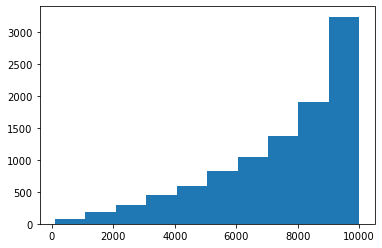

In [6]:
plt.hist(progressive_10k)

<br>

## Random Floats

In [7]:
rand_flt = rng.random(10000)

(array([ 944., 1009., 1001.,  996., 1022.,  997., 1056.,  938.,  970.,
        1067.]),
 array([2.96936726e-05, 1.00021207e-01, 2.00012721e-01, 3.00004235e-01,
        3.99995749e-01, 4.99987263e-01, 5.99978776e-01, 6.99970290e-01,
        7.99961804e-01, 8.99953318e-01, 9.99944831e-01]),
 <BarContainer object of 10 artists>)

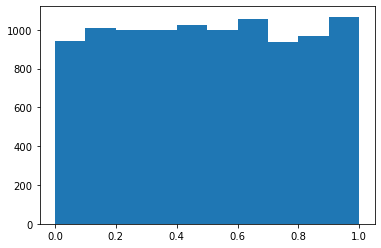

In [8]:
plt.hist(rand_flt)

# References 
- https://numpy.org/doc/stable/user/whatisnumpy.html
- [2] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers